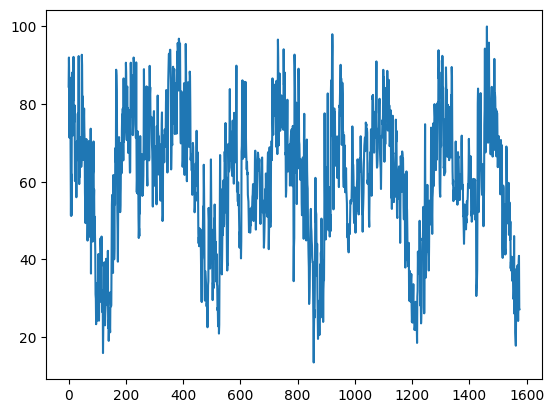

In [1]:
import pandas
import matplotlib.pyplot as plt

dataset = pandas.read_csv('daily-climate.csv', usecols=[2], engine='python')
plt.plot(dataset)
plt.show()

In [3]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
import pickle
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
numpy.random.seed(7)
datafram = pandas.read_csv('daily-climate.csv', usecols=[2], engine='python')
dataset = datafram.values
dataset = dataset.astype('float32')

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [6]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1055 521


In [7]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [8]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [11]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

pickle.dump(model, open('time-series-prediction-model.pkl', 'wb'))

Epoch 1/100
1051/1051 - 3s - loss: 0.0390 - 3s/epoch - 3ms/step
Epoch 2/100
1051/1051 - 2s - loss: 0.0125 - 2s/epoch - 2ms/step
Epoch 3/100
1051/1051 - 2s - loss: 0.0111 - 2s/epoch - 2ms/step
Epoch 4/100
1051/1051 - 2s - loss: 0.0105 - 2s/epoch - 2ms/step
Epoch 5/100
1051/1051 - 2s - loss: 0.0099 - 2s/epoch - 2ms/step
Epoch 6/100
1051/1051 - 2s - loss: 0.0097 - 2s/epoch - 2ms/step
Epoch 7/100
1051/1051 - 2s - loss: 0.0094 - 2s/epoch - 2ms/step
Epoch 8/100
1051/1051 - 2s - loss: 0.0094 - 2s/epoch - 2ms/step
Epoch 9/100
1051/1051 - 2s - loss: 0.0093 - 2s/epoch - 2ms/step
Epoch 10/100
1051/1051 - 2s - loss: 0.0093 - 2s/epoch - 2ms/step
Epoch 11/100
1051/1051 - 2s - loss: 0.0091 - 2s/epoch - 2ms/step
Epoch 12/100
1051/1051 - 2s - loss: 0.0091 - 2s/epoch - 2ms/step
Epoch 13/100
1051/1051 - 2s - loss: 0.0090 - 2s/epoch - 2ms/step
Epoch 14/100
1051/1051 - 2s - loss: 0.0092 - 2s/epoch - 2ms/step
Epoch 15/100
1051/1051 - 2s - loss: 0.0091 - 2s/epoch - 2ms/step
Epoch 16/100
1051/1051 - 2s - loss

In [12]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Train Score: %.2f RMSE' % (testScore))

17/17 [==============================] - 0s 2ms/step
Train Score: 8.12 RMSE
Train Score: 7.36 RMSE


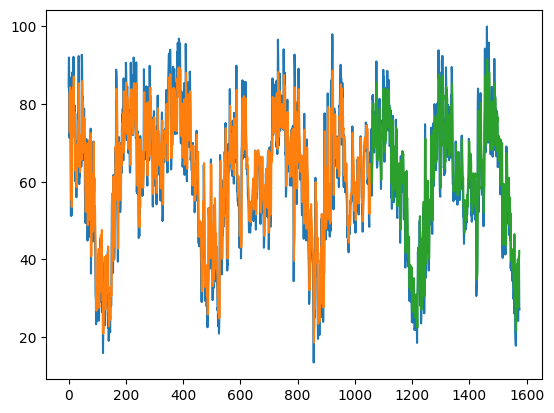

In [14]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :]  = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()